<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/10%EC%A3%BC%EC%B0%A8/CNN_w10_smartphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN 실습
UCI - Human Activity Recognition Using Smartphones 데이터 활용

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns



def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1973390525.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=Tr

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [ ]:
#CNN 모델 적용
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 9)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#CNN 모델 컴파일
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#CNN 모델을 이용한 학습
history_cnn = model_cnn.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/30
42/42 - 6s - 145ms/step - accuracy: 0.6920 - loss: 0.7530 - val_accuracy: 0.8268 - val_loss: 0.3669
Epoch 2/30
42/42 - 3s - 69ms/step - accuracy: 0.8949 - loss: 0.2693 - val_accuracy: 0.9355 - val_loss: 0.1861
Epoch 3/30
42/42 - 6s - 154ms/step - accuracy: 0.9395 - loss: 0.1625 - val_accuracy: 0.9083 - val_loss: 0.2159
Epoch 4/30
42/42 - 3s - 75ms/step - accuracy: 0.9386 - loss: 0.1514 - val_accuracy: 0.9389 - val_loss: 0.1318
Epoch 5/30
42/42 - 4s - 102ms/step - accuracy: 0.9478 - loss: 0.1205 - val_accuracy: 0.9457 - val_loss: 0.1155
Epoch 6/30
42/42 - 3s - 60ms/step - accuracy: 0.9535 - loss: 0.1106 - val_accuracy: 0.9508 - val_loss: 0.1094
Epoch 7/30
42/42 - 2s - 56ms/step - accuracy: 0.9573 - loss: 0.1051 - val_accuracy: 0.9457 - val_loss: 0.1175
Epoch 8/30
42/42 - 4s - 101ms/step - accuracy: 0.9554 - loss: 0.1047 - val_accuracy: 0.9508 - val_loss: 0.1076
Epoch 9/30
42/42 - 3s - 80ms/step - accuracy: 0.9594 - loss: 0.1002 - val_accuracy: 0.9508 - val_loss: 0.1010
Epoch 

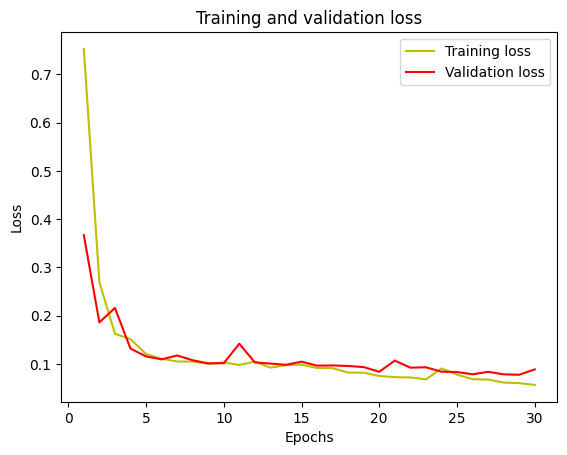

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history_cnn.history['loss']
val_loss =history_cnn.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

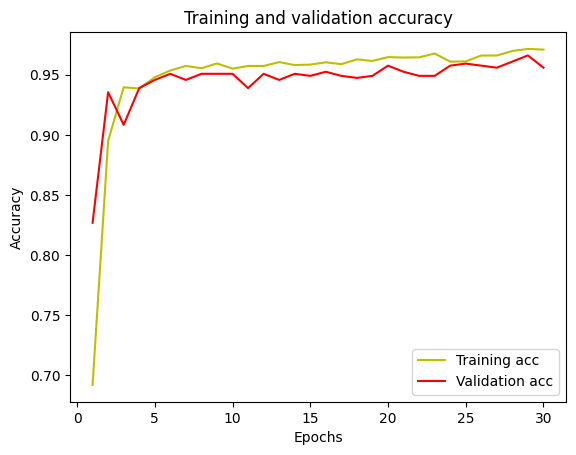

In [ ]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[[464   3  29   0   0   0]
 [  0 451  20   0   0   0]
 [  0   8 412   0   0   0]
 [  0   7   0 421  63   0]
 [  0   4   0 110 418   0]
 [  0  27   0   0   0 510]]
0.9080420766881574
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       496
           1       0.90      0.96      0.93       471
           2       0.89      0.98      0.94       420
           3       0.79      0.86      0.82       491
           4       0.87      0.79      0.83       532
           5       1.00      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

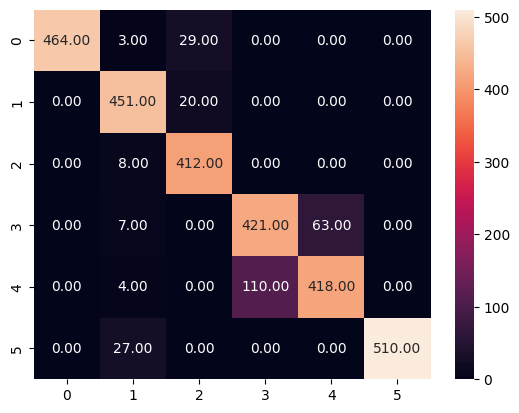

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

pred = model_cnn.predict([testX,testX,testX,testX])
pred = np.argmax(pred, axis = -1)
cm = confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')